# Univariate Linear Regression on the California Housing Prices Dataset

# 1-Framing the Problem

The goal of this study is to build a univariate linear regression model and investigate the link between median home value and each independent variable, including median income, population, and number of households. Our goal is to discover how these independent variables influence the average property value, and possibly obtain insights into making predictions or better understanding the housing market.The goal of this study is to build a univariate linear regression model and investigate the link between median home value and each independent variable, including median income, population, and number of households. Our goal is to determine how these independent variables influence the average house value, and potentially obtain insights into making predictions or better understanding the housing market.

# 2-Getting the Data

In [375]:
import pandas as pd
data = pd.read_csv('data/housing.csv')

# 3-Exploratory Data Analysis (EDA)

(1) Explore statistics

In [376]:
data.describe()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.2300,37.8800,41.0000,880.0000,129.0000,322.0000,126.0000,8.3252,452600.0000,NEAR BAY
1,-122.2200,37.8600,21.0000,7099.0000,1106.0000,2401.0000,1138.0000,8.3014,358500.0000,NEAR BAY
2,-122.2400,37.8500,52.0000,1467.0000,190.0000,496.0000,177.0000,7.2574,352100.0000,NEAR BAY
3,-122.2500,37.8500,52.0000,1274.0000,235.0000,558.0000,219.0000,5.6431,341300.0000,NEAR BAY
4,-122.2500,37.8500,52.0000,1627.0000,280.0000,565.0000,259.0000,3.8462,342200.0000,NEAR BAY


(2) Range of the data for each variable

In [377]:
X_income = data[['median_income']]
X_population = data[['population']]
X_households = data[['households']]
y = data['median_house_value']

# Check for missing values
print(data.isnull().sum())

# Check the data types and statistics
print(data.dtypes)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


(3) Seaborn scatter plots

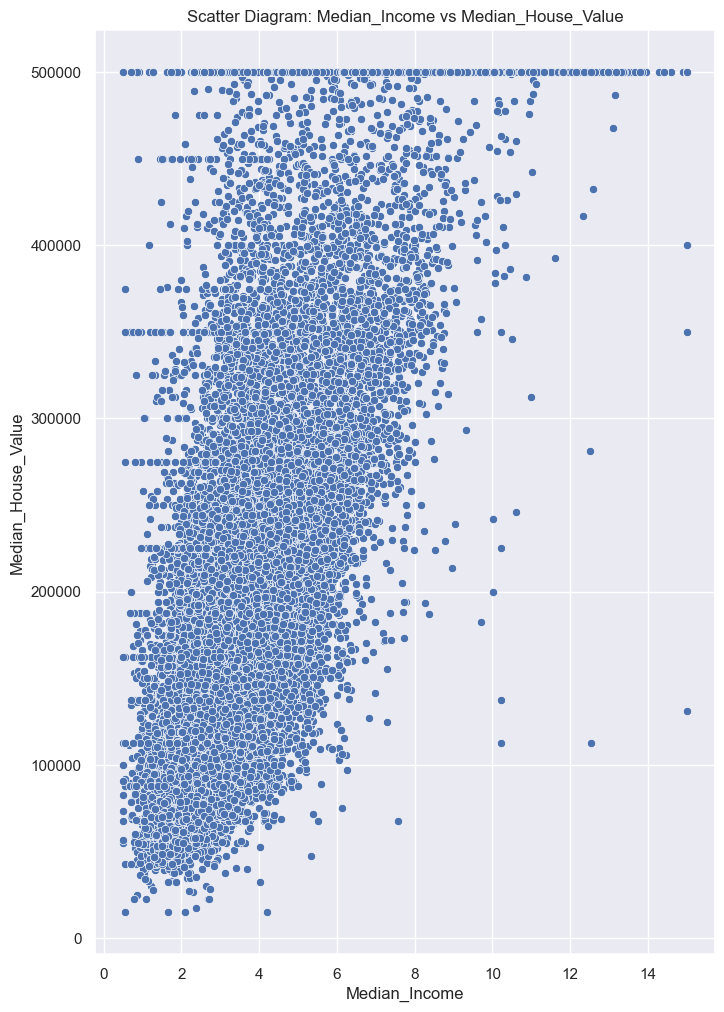

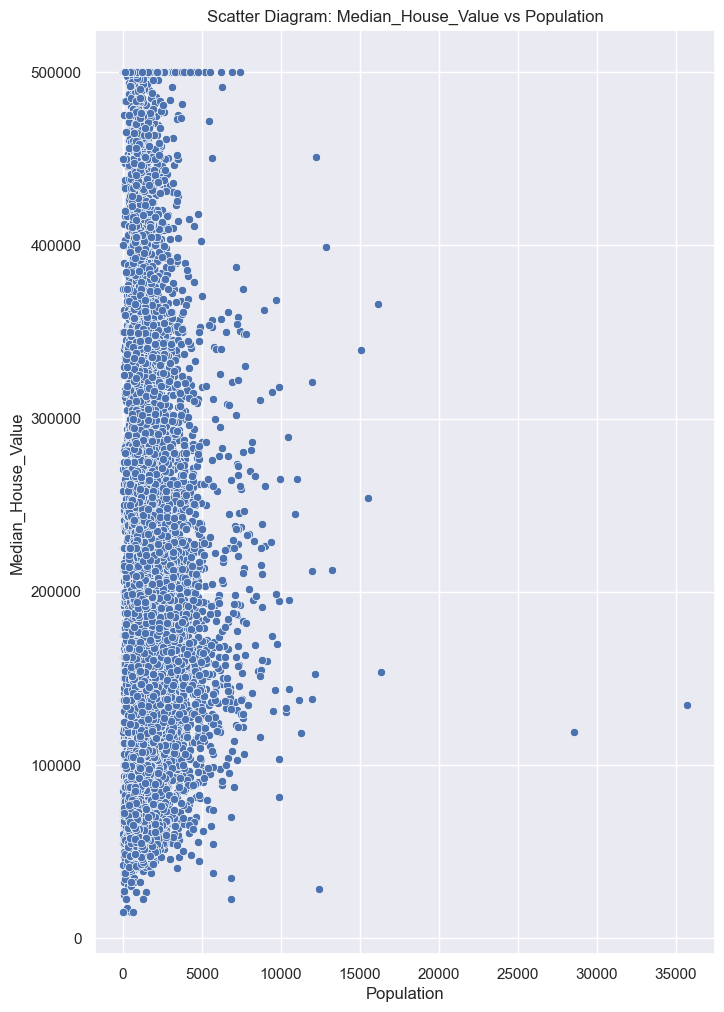

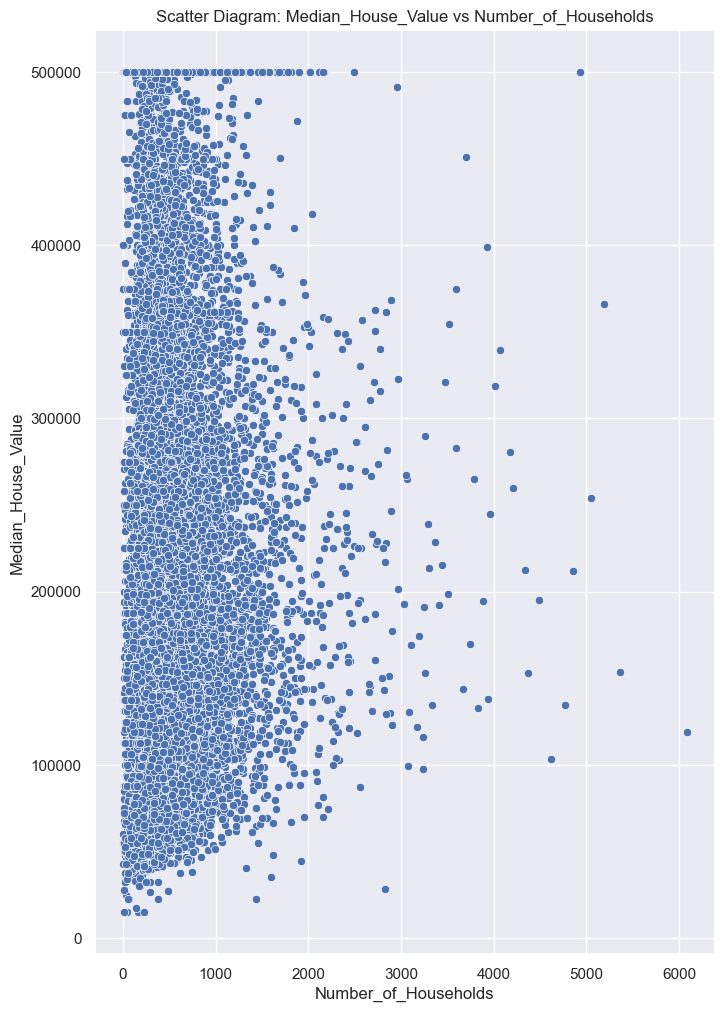

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="darkgrid")

# Scatter plot: Median_Income vs Median_House_Value
plt.figure(figsize=(8,12))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Scatter Diagram: Median_Income vs Median_House_Value')
plt.xlabel('Median_Income')
plt.ylabel('Median_House_Value')
plt.show()

# Scatter plot: Median_House_Value vs Population
plt.figure(figsize=(8,12))
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Scatter Diagram: Median_House_Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median_House_Value')
plt.show()

# Scatter plot: Median_House_Value vs Number_of_Households
plt.figure(figsize=(8,12))
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Scatter Diagram: Median_House_Value vs Number_of_Households')
plt.xlabel('Number_of_Households')
plt.ylabel('Median_House_Value')
plt.show()


# 4-Running three linear regressions

In [379]:
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


model = linear_model.LinearRegression()

# ModelA : Linear Regression Model for comparision between Median Income and Median House Price

In [380]:
X1 = data[['median_income']]
y1 = data['median_house_value']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=64)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

# Linear Regression Model for comparision between Population and Median House Price

In [381]:
X2 = data[['population']]
y2 = data['median_house_value']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=64)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

# Linear Regression Model for comparision between Households and Median House Price

In [382]:
X3 = data[['households']]
y3 = data['median_house_value']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4, random_state=64)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

If you are using Jupyter, please rerun this cell to see the HTML representation, or trust the notebook.
The HTML representation on GitHub is not rendering; please try loading this page using nbviewer.org.

# 5-Summary Table

Intercept, Slope ,Mean Squared Error - the loss and Mean Absolute Error

This table will show summary of model performance given 3 different features

In [383]:
# This function will show values for the large values like Mean squared error as float values without exponents
pd.set_option('display.float_format', lambda x: '%.4f' % x)
summary_table

,Model,Intercept,Slope,Mean Squared Error,Mean Absolute Error
0,Model 1,44459.7292,41933.8494,7091157771.7655,62990.8653
1,Model 2,210970.6963,-2.6471,13102870667.5040,90588.8777
2,Model 3,197526.3692,19.3372,13035578954.7830,90218.2581


# (6) Resulting line

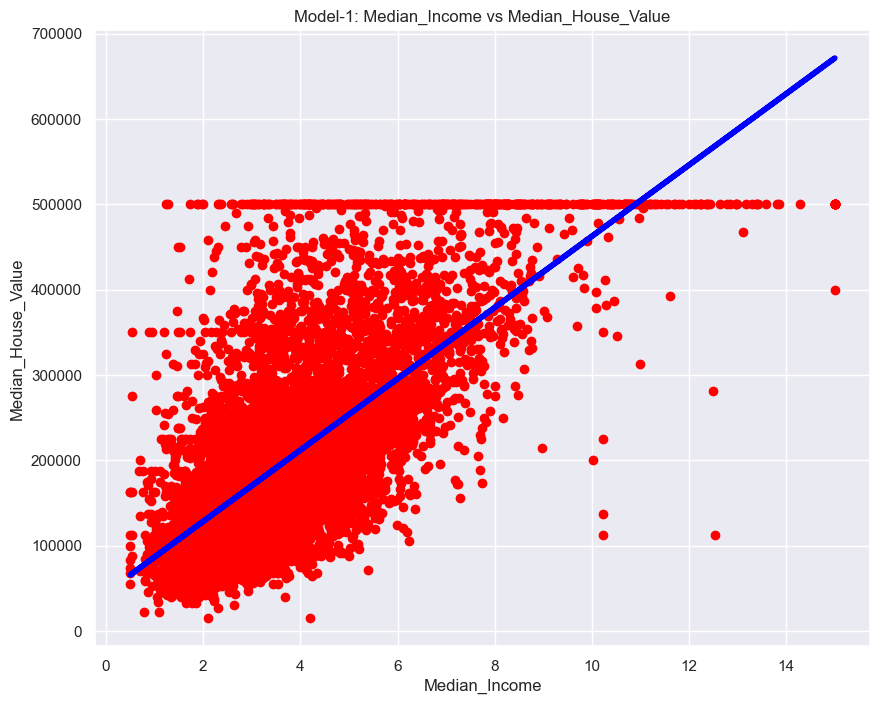

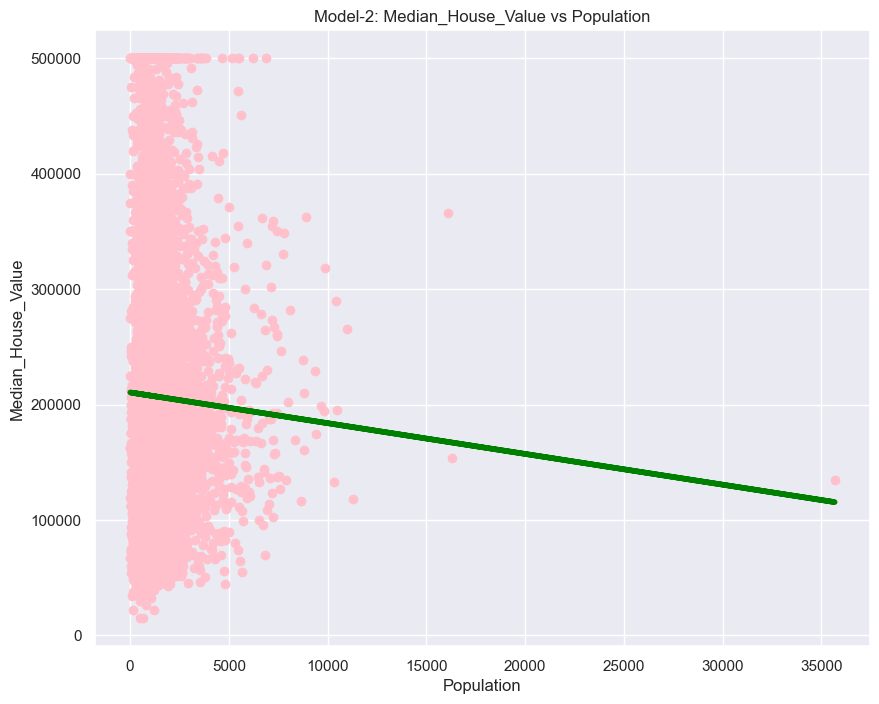

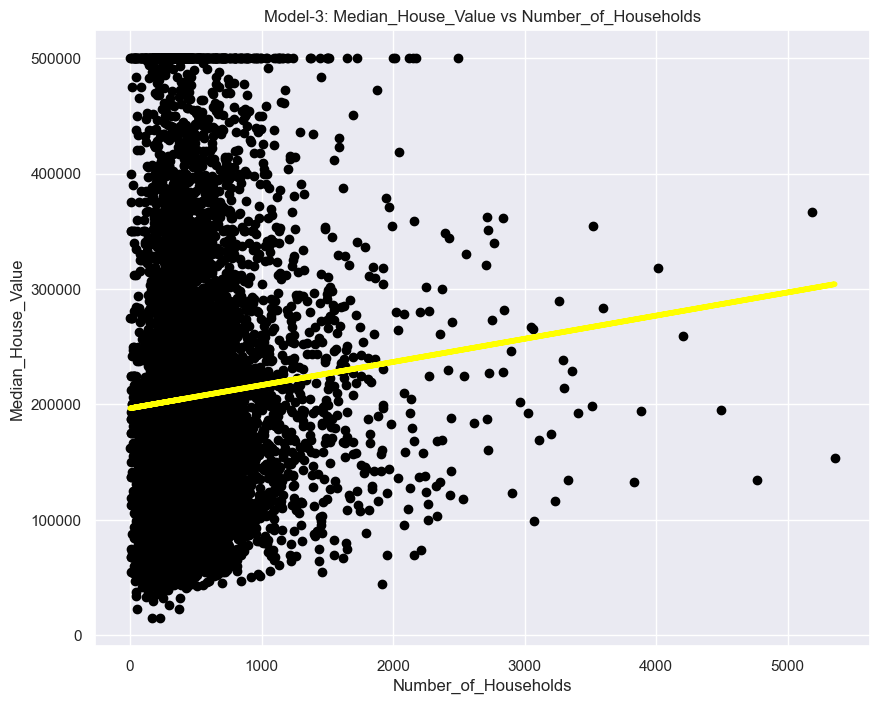

In [384]:
# Plotting Model-1
plt.figure(figsize=(10, 8))
plt.scatter(X1_test, y1_test, color='red')
plt.plot(X1_test, model1.predict(X1_test), color='blue', linewidth=4)
plt.title('Model-1: Median_Income vs Median_House_Value')
plt.xlabel('Median_Income')
plt.ylabel('Median_House_Value')
plt.show()

# Plotting Model-2
plt.figure(figsize=(10, 8))
plt.scatter(X2_test, y2_test, color='pink')
plt.plot(X2_test, model2.predict(X2_test), color='green', linewidth=4)
plt.title('Model-2: Median_House_Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median_House_Value')
plt.show()

# Plotting Model-3
plt.figure(figsize=(10, 8))
plt.scatter(X3_test, y3_test, color='black')
plt.plot(X3_test, model3.predict(X3_test), color='yellow', linewidth=4)
plt.title('Model-3: Median_House_Value vs Number_of_Households')
plt.xlabel('Number_of_Households')
plt.ylabel('Median_House_Value')
plt.show()

# (7) Conclusion

Model:1

When all other parameters are 0, the intercept offers a baseline value for median house value, and the positive slope indicates that median house value grows as the related variable rises. The lower mean squared error and mean absolute error indicate better model performance, implying that Model 1 accurately matches the data.


Model:2

Model 2 has a negative slope due to its comparatively large intercept, meaning that when the corresponding variable grows, the median house value will decrease. However, the elevated mean squared error and mean absolute error show unsatisfactory model fit, implying that this model may not be best suited to the data.


Model:3

Similar to Model 2, Model 3 has a relatively large intercept, and its positive slope indicates a rise in median house value with the relevant variable. The somewhat high mean squared error and mean absolute error suggest a degree of prediction error, implying that Model 3 may not be as accurate as Model 1.


In conclusion, based on the MSE and MAE values, median income appears to be the most reliable predictor of median house value among the variables we considered.